# DAB200 -- Lab 1
* Group Number: 16
* Group members and their student IDs:
* Umair Nabeel - 0780185
* Rakesh Singh - 0775942
* Harshdeep Jarnail Singh Thinde - 0775726

## Part 1 - Creating and evaluating a random forest model

In this part of the lab, you should:
 - read in the data;
 - verify that all the data is numeric and that there are no missing values;
 - split the data into training and validation sets with a ratio of 80:20 for training:testing);
 - create a random forest model using the data with the default hyper-parameters;
 - evaluate the model on both the training and validation sets using MAE and % error.
 

In [1]:
#importing required modules and packages
#Pandas is an open-source Python Library providing high-performance data manipulation and analysis tool using its powerful data structures.
import pandas as pd

#NumPy is a Python library used for working with the arrays.
#It also has functions for working in domain of linear algebra and matrices.
import numpy as np

#matplotlib.pyplot is a collection of functions that make matplotlib work just like MATLAB
import matplotlib.pyplot as plt

#The sklearn library contains a lot of the efficient tools for machine learning and statistical modeling
#including classification, regression, clustering and dimensionality reduction.
from sklearn.ensemble import RandomForestRegressor

In [2]:
#reading the data from house_data csv file and assigning that to a variable called house_data and adding 1 to index so the index will start from 1 instead of 0.
house_data = pd.read_csv ('E:\Data_Analytics\SEM2\DAB200\lab1\house_data.csv')
house_data.index = house_data.index+1

In [3]:
#head of the data gives us some info by looking at the first 5 rows.
house_data.head()

,bedrooms,bathrooms,m2_living,floors,m2_above,m2_basement,m2_lot,view,quality,yr_built,renovated_last_5,city,statezip,price
1,3,1.50,124.0,1.5,124.0,0.0,735.0,0,3,1961,0,37,63,313000.0
2,5,2.50,339.0,2.0,313.0,26.0,841.0,4,5,1927,1,36,59,2384000.0
3,3,2.00,179.0,1.0,179.0,0.0,1110.0,0,4,1972,1,19,27,342000.0
4,3,2.25,186.0,1.0,93.0,93.0,746.0,0,4,1969,1,4,8,420000.0
5,4,2.50,180.0,1.0,106.0,74.0,975.0,0,4,1982,0,32,32,550000.0


In [4]:
#we can see that all the data in the columns are of numeric type ie.integers and float types.
house_data.dtypes

bedrooms              int64
bathrooms           float64
m2_living           float64
floors              float64
m2_above            float64
m2_basement         float64
m2_lot              float64
view                  int64
quality               int64
yr_built              int64
renovated_last_5      int64
city                  int64
statezip              int64
price               float64
dtype: object

In [5]:
#isna() is used to check if there are any missing values and 0 indicates there are no missing values in the variables.
house_data.isnull().sum()

bedrooms            0
bathrooms           0
m2_living           0
floors              0
m2_above            0
m2_basement         0
m2_lot              0
view                0
quality             0
yr_built            0
renovated_last_5    0
city                0
statezip            0
price               0
dtype: int64

In [6]:
#The train_test_split function is for splitting a single dataset for two different purposes: training and testing.
from sklearn.model_selection import train_test_split

#Here X is the set of features and also known as independent variables.
X = house_data[['bathrooms','bedrooms','m2_living', 'floors', 'm2_above', 'm2_basement', 'm2_lot', 'view', 'quality', 'yr_built', 'renovated_last_5', 'city', 'statezip']]

#The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding.
#Here price is the target variable which we want to predict.
y = house_data['price']

#The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
X.head()

,bathrooms,bedrooms,m2_living,floors,m2_above,m2_basement,m2_lot,view,quality,yr_built,renovated_last_5,city,statezip
1,1.50,3,124.0,1.5,124.0,0.0,735.0,0,3,1961,0,37,63
2,2.50,5,339.0,2.0,313.0,26.0,841.0,4,5,1927,1,36,59
3,2.00,3,179.0,1.0,179.0,0.0,1110.0,0,4,1972,1,19,27
4,2.25,3,186.0,1.0,93.0,93.0,746.0,0,4,1969,1,4,8
5,2.50,4,180.0,1.0,106.0,74.0,975.0,0,4,1982,0,32,32


In [8]:
y.head()

1     313000.0
2    2384000.0
3     342000.0
4     420000.0
5     550000.0
Name: price, dtype: float64

In [9]:
#Random forest regression is supervised learning algorithm that uses ensemble learning method of regression.
#Ensemble learning is a technique that combines predictions from multiple algorithms to make more
#accurate predictions than a single model.

from sklearn.ensemble import RandomForestRegressor

#The mean absolute error of a model with respect to a test_set is the mean of absolute values of the individual
#prediction errors on over all instances in the test_set.
from sklearn.metrics import mean_absolute_error

#n_estimators is the number of trees in the forest and we have kept that default which is 100.

rf = RandomForestRegressor() 

#fit is used to fit the model on the training data.
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [10]:
#To actually make a prediction, we call predict() on training dataset.
#MAE measures the average magnitude of the errors in a set of predictions without considering their direction.
#Finding MAE and percentage of error on the train set of data to know the average of the errors in the predictions.

predictions = rf.predict(X_train)

e_train = mean_absolute_error(y_train, predictions)

ep_train = e_train*100 / y.mean()

print(f"${e_train:.0f} average error; {ep_train:.2f}% error")

$52302 average error; 9.48% error


In [11]:
#using fit on testing dataset.
rf.fit(X_test, y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
#Finding MAE and percentage of error on the validation set.
predictions = rf.predict(X_test)

e_test = mean_absolute_error(y_test, predictions)

ep_test = e_test*100 / y.mean()

print(f"${e_test:.0f} average error; {ep_test:.2f}% error")

$52563 average error; 9.52% error


## Part 2 - Exploring the `n_estimators` hyper-parameter

In this part of the lab you should: 
 - use a `for` loop to create a random forest model for each value of `n_estimators` from 1 to 30;
 - evaluate each model on both the validation set only using MAE;

After that you should answer the following questions:
 - Which value of `n_estimators` gives the best results? 
 - Explain how you decided that this value for `n_estimators` gave the best results;
 - Was the result here better than the result of Part 1? What % better or worse was it?

In [13]:
#using the for loop with n_estimator(number of trees) for values from 1 to 30 on the random forest model.
#assigning a variable to frame to insert the values in later stage.

frame_train = []
frame_validate=[]

#for loop to repeat the code below with the values of x from 1 to 30 including 30 and excluding 31

for x in range(1,31):
    #creating random forest model with x as the number of the trees in forest to make more predictions.
    rf2 = RandomForestRegressor(n_estimators=x)
    #fitting the random forest regressor model with the train set of data.
    rf2.fit(X_train, y_train)
    predictions = rf2.predict(X_train)
    #finding the mean absolute error ie. mean of absolute values of individual prediction errors on training dataset.
    e_train = mean_absolute_error(y_train, predictions)
    #assigning the result we got to the variable called t.
    t=e_train*100.0/y.mean()
    print(f"Training data set: n_estimator = {x}; ${e_train:.0f} average error")
    
    
    rf2 = RandomForestRegressor(n_estimators=x)
    rf2.fit(X_test, y_test)
    predictions_test = rf2.predict(X_test)
    #finding the mean absolute error ie. mean of absolute values of individual prediction errors.
    e_test = mean_absolute_error(y_test, predictions_test)
    #assigning the result we got to the variable called v.
    v=e_test*100.0/y.mean()
    print(f"Test data set: n_estimator = {x}; ${e_test:.0f} average error")
    
    #inserting the results of validation and train mean absolute errors into the different variables.
    frame_validate.insert(x,[e_test,  x, v])
    frame_train.insert(x,[e_train, x, t])    
    #assiginig to a dataframe
frame_validate = pd.DataFrame(frame_validate, columns= ["Mean_absolute_error","n_estimators_value", "error%"])
frame_train = pd.DataFrame(frame_train, columns= ["Mean_absolute_error","n_estimators_value", "error%"])    

Training data set: n_estimator = 1; $69399 average error
Test data set: n_estimator = 1; $80892 average error
Training data set: n_estimator = 2; $78562 average error
Test data set: n_estimator = 2; $65146 average error
Training data set: n_estimator = 3; $66771 average error
Test data set: n_estimator = 3; $68939 average error
Training data set: n_estimator = 4; $75853 average error
Test data set: n_estimator = 4; $68916 average error
Training data set: n_estimator = 5; $62404 average error
Test data set: n_estimator = 5; $62776 average error
Training data set: n_estimator = 6; $64096 average error
Test data set: n_estimator = 6; $61898 average error
Training data set: n_estimator = 7; $67109 average error
Test data set: n_estimator = 7; $59776 average error
Training data set: n_estimator = 8; $59461 average error
Test data set: n_estimator = 8; $61796 average error
Training data set: n_estimator = 9; $58843 average error
Test data set: n_estimator = 9; $62350 average error
Training d

In [14]:
#display the dataframe with the column names and values that we assigned above.
frame_validate

,Mean_absolute_error,n_estimators_value,error%
0,80891.554869,1,14.655250
1,65146.211626,2,11.802641
2,68938.943132,3,12.489776
3,68915.524017,4,12.485534
4,62776.435387,5,11.373305
5,61898.080126,6,11.214172
6,59775.775852,7,10.829671
7,61796.140326,8,11.195704
8,62349.660948,9,11.295986
9,60456.882227,10,10.953068


In [30]:
min(frame_validate['Mean_absolute_error']),min(frame_validate['error%'])
# at n_estimator = 30

(54051.82481810507, 9.792653845801256)

In [15]:
#display the dataframe with the column names and values that we assigned above.
frame_train

,Mean_absolute_error,n_estimators_value,error%
0,69399.426193,1,12.573203
1,78562.435116,2,14.233280
2,66771.460951,3,12.097090
3,75853.030636,4,13.742412
4,62403.867631,5,11.305807
5,64095.783024,6,11.612334
6,67108.531617,7,12.158158
7,59460.914864,8,10.772627
8,58843.459776,9,10.660762
9,58468.266312,10,10.592787


In [31]:
min(frame_train['Mean_absolute_error']),min(frame_train['error%'])
# at n_estimator = 26

(53247.67622280832, 9.64696498403149)

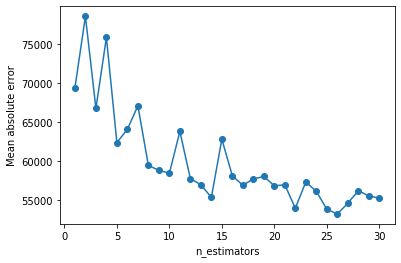

In [16]:
#plot the data in the dataframe in the form of map with the use of matplotlib.pyplot imported above as plt.
plt.plot(frame_train.n_estimators_value, frame_train.Mean_absolute_error, marker="o")
#label to put text on x axis.
plt.xlabel("n_estimators")
#label to put text on the y axis.
plt.ylabel("Mean absolute error")
#plt.show() starts a loop, looks for all currently active figure objects, 
#and opens one or more interactive windows that display figures.
plt.show()

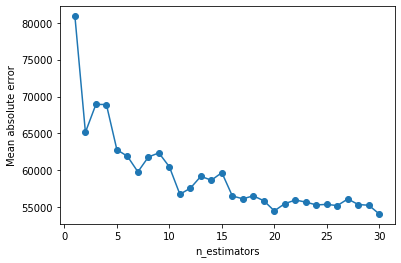

In [17]:
#plot the data in the dataframe in the form of map with the use of matplotlib.pyplot imported above as plt.
plt.plot(frame_validate.n_estimators_value, frame_validate.Mean_absolute_error, marker="o")
#label to put text on x axis.
plt.xlabel("n_estimators")
#label to put text on the y axis.
plt.ylabel("Mean absolute error")
#plt.show() starts an event loop, looks for all currently active figure objects, 
#and opens one or more interactive windows that display figures.
plt.show()

* n_estimator value of 30 gives the best result in validation and value of 26 gives best result in training set..
* The curve is not smooth because different values of trees used as n_estimators gave different values of mean absolute errors. The reason for selecting above mentioned values are beacause of minimum mean absolute error for those particular values.
* The minimum error percentage is similar to error percentage in part 1.

## Part 3 - Exploring the `max_features` hyper-parameter

In this part of the lab you should: 
 - use a `for` loop to create a random forest model for each value of `max_features` from 1 to the total number of features in the data;
 - for each model, use the value for `n_estimators` as determined in Part 2;
 - evaluate each model on the testing set using MAE;
 
After that you should answer the following questions:
 - Which value of `max_features` gives the best results?
 - Explain how you decided that this value for `max_features` gave the best results;
 - Was the result here better than the result of Part 2? Why is that? What % better or worse was it?

In [18]:
frame1_train = []
frame1_validate=[]
#for loop to repeat the code below with the values of i from 1 to 13 including 13 and excluding 14
for n in range(1,14):

    ##creating random forest model with m as the max features
    #(max features to consider for split) to make more predictions.
    rf3 = RandomForestRegressor(max_features=n)
    #fitting the random forest regressor model with the train set of data.
    rf3.fit(X_train, y_train)
    predictions_tr = rf3.predict(X_train)
    
    train1_e = mean_absolute_error(y_train, predictions_tr)
    #assigning the result we got to the variable called tr.
    tr=train1_e*100.0/y.mean()
    
    print(f"Training data set: max_features = {n}; ${tr:.2f} average error")
    
    rf3 = RandomForestRegressor(max_features=n)
    rf3.fit(X_test, y_test)
    predictions_te = rf3.predict(X_test)
    
    validation1_e = mean_absolute_error(y_test, predictions_te)
    va=validation1_e*100.0/y.mean()
    print(f"Test data set: max_features = {n}; ${tr:.2f} average error")
    
    frame1_validate.insert(n,[validation1_e,  n, va])
    frame1_train.insert(n,[train1_e, n, tr])
frame1_validate = pd.DataFrame(frame1_validate, columns= ["Mean_absolute_error","max_features_value", "error%"])
frame1_train = pd.DataFrame(frame1_train, columns= ["Mean_absolute_error","max_features_value", "error%"])

Training data set: max_features = 1; $10.43 average error
Test data set: max_features = 1; $10.43 average error
Training data set: max_features = 2; $10.11 average error
Test data set: max_features = 2; $10.11 average error
Training data set: max_features = 3; $9.91 average error
Test data set: max_features = 3; $9.91 average error
Training data set: max_features = 4; $9.77 average error
Test data set: max_features = 4; $9.77 average error
Training data set: max_features = 5; $9.77 average error
Test data set: max_features = 5; $9.77 average error
Training data set: max_features = 6; $9.55 average error
Test data set: max_features = 6; $9.55 average error
Training data set: max_features = 7; $9.57 average error
Test data set: max_features = 7; $9.57 average error
Training data set: max_features = 8; $9.53 average error
Test data set: max_features = 8; $9.53 average error
Training data set: max_features = 9; $9.62 average error
Test data set: max_features = 9; $9.62 average error
Traini

In [19]:
#display the dataframe with the column names and values that we assigned above.
frame1_validate

,Mean_absolute_error,max_features_value,error%
0,55769.491120,1,10.103846
1,53779.031259,2,9.743231
2,54287.368931,3,9.835328
3,54673.668804,4,9.905314
4,53605.861238,5,9.711858
5,52832.144267,6,9.571682
6,53095.996213,7,9.619485
7,50986.283901,8,9.237265
8,52511.822783,9,9.513649
9,51803.297379,10,9.385285


In [33]:
min(frame1_validate['Mean_absolute_error']),min(frame1_validate['error%'])
# at n_estimator = 8

(50986.283901203264, 9.237264991671315)

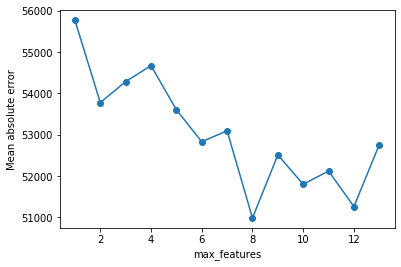

In [20]:
#plot the data in the dataframe in the form of map with the use of matplotlib.pyplot imported above as plt.
plt.plot(frame1_validate.max_features_value, frame1_validate.Mean_absolute_error, marker="o")
#label to put text on x axis.
plt.xlabel("max_features")
#label to put text on y axis.
plt.ylabel("Mean absolute error")
#plt.show() starts an event loop, looks for all currently active figure objects, 
#and opens one or more interactive windows that display figures.
plt.show()

In [21]:
#display the dataframe with the column names and values that we assigned above.
frame1_train

,Mean_absolute_error,max_features_value,error%
0,57558.311202,1,10.427929
1,55780.507639,2,10.105842
2,54677.442192,3,9.905998
3,53947.266917,4,9.773711
4,53913.459954,5,9.767586
5,52698.168504,6,9.547410
6,52820.148270,7,9.569509
7,52583.172284,8,9.526576
8,53072.239250,9,9.615181
9,53694.564559,10,9.727928


In [35]:
min(frame1_train['Mean_absolute_error']),min(frame1_train['error%'])
# at n_estimator = 13

(51351.672313114854, 9.303462983120417)

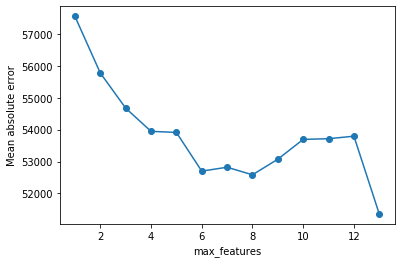

In [22]:
#plot the data in the dataframe in the form of map with the use of matplotlib.pyplot imported above as plt.
plt.plot(frame1_train.max_features_value, frame1_train.Mean_absolute_error, marker="o")
#label to put text on x axis.
plt.xlabel("max_features")
#label to put text on y axis.
plt.ylabel("Mean absolute error")
#plt.show() starts an event loop, looks for all currently active figure objects, 
#and opens one or more interactive windows that display figures.
plt.show()

* max_features value of 8 gives the best result in validation and value of 13 gives best result in training set.
* The reason for selecting max_feature as 8 is because the mean absolute error for it is least as compared to all the other values.
* The error percent is less from part2 by 0.2-0.4% compared to that of part3.